In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [ ]:
def compress_df(folder):
  train = pd.DataFrame()
  val = pd.DataFrame()

  for files in folder:
    phase = files.split('/')[-1].split('_')[0]
    if phase == 'train':
      temp = pd.read_csv(files)
      temp['model'] = temp['model'] + ' ' + files.split('/')[-1].split('_')[1].split('.')[0] + ' ' + files.split('/')[-1].split('_')[2].split('.')[0]
      train = pd.concat([train, temp])
    elif phase == 'val':
      temp1 = pd.read_csv(files)
      temp1['model'] = temp1['model'] + ' ' + files.split('/')[-1].split('_')[1].split('.')[0] + ' ' + files.split('/')[-1].split('_')[2].split('.')[0]
      val = pd.concat([val, temp1])
  
  return train, val

In [ ]:
def extract_csv(folder_path):
  path = glob(folder_path)

  train, val = compress_df(path)
  train = train.reset_index()
  val = val.reset_index()

  for i in train.index:
    train['epoch_acc'][i] = train['epoch_acc'][i].split('(')[1].split(',')[0]

  for i in val.index:
    val['epoch_acc'][i] = val['epoch_acc'][i].split('(')[1].split(',')[0]

  train['epoch_acc'] = train['epoch_acc'].astype(float)
  val['epoch_acc'] = val['epoch_acc'].astype(float)

  return train, val

In [ ]:
path_sch = '/content/drive/MyDrive/Model/leukemia/ori_data/sch/csv/*'
path = '/content/drive/MyDrive/Model/leukemia/ori_data/no_sch/csv/*'

In [ ]:
train_sch, val_sch = extract_csv(path_sch)
train, val = extract_csv(path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Text(0.5, 1.0, 'Model Accuracy With Scheduler')

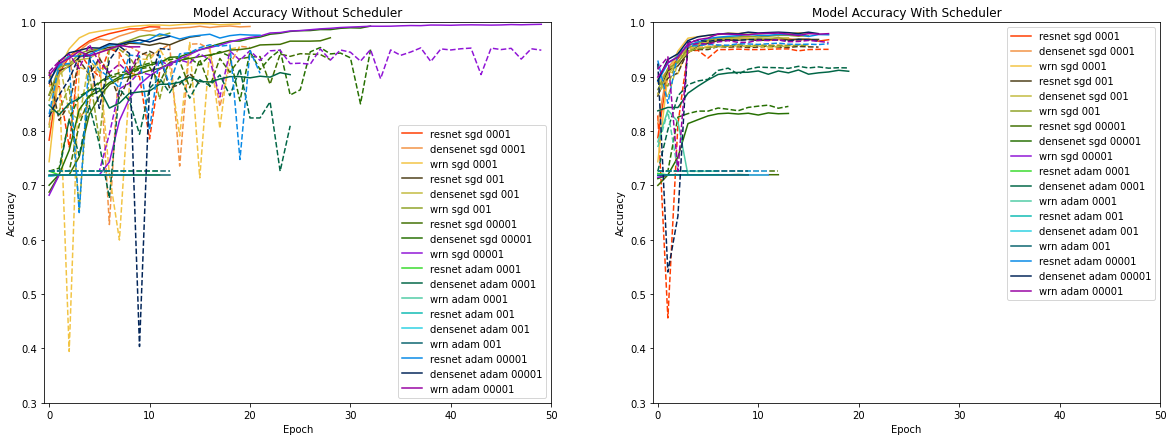

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,7))

style=['#ff3c00', '#f29244', '#f2c444', '#4d3e18', '#c2bb3e', '#8fa327', '#417002', '#277002', '#9015d6',
       '#38db2c', '#016646', '#50cca5', '#0fbab2', '#2dd1e3', '#09646e', '#0789e6', '#022559', '#9802a3']
for i, model in enumerate(train['model'].unique()):
  ax[0].plot(range(len(train[train.model == model])), train[train.model == model]['epoch_acc'], label=model, color=style[i])
  ax[0].plot(range(len(val[val.model == model])), val[val.model == model]['epoch_acc'], color=style[i], linestyle='dashed')

for i, model in enumerate(train_sch['model'].unique()):
  ax[1].plot(range(len(train_sch[train_sch.model == model])), train_sch[train_sch.model == model]['epoch_acc'], label=model, color=style[i])
  ax[1].plot(range(len(val_sch[val_sch.model == model])), val_sch[val_sch.model == model]['epoch_acc'], color=style[i], linestyle='dashed')

ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set(ylim=(0.3, 1.0))
ax[0].set(xlim=(-0.5, 50))
ax[0].set_title('Model Accuracy Without Scheduler')

ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set(ylim=(0.3, 1.0))
ax[1].set(xlim=(-0.5, 50))
ax[1].set_title('Model Accuracy With Scheduler')

In [ ]:
path_sch = '/content/drive/MyDrive/Model/leukemia/he_data/sch/csv/*'
path = '/content/drive/MyDrive/Model/leukemia/he_data/no_sch/csv/*'

In [ ]:
train_sch, val_sch = extract_csv(path_sch)
train, val = extract_csv(path)

Text(0.5, 1.0, 'Model Accuracy With Scheduler')

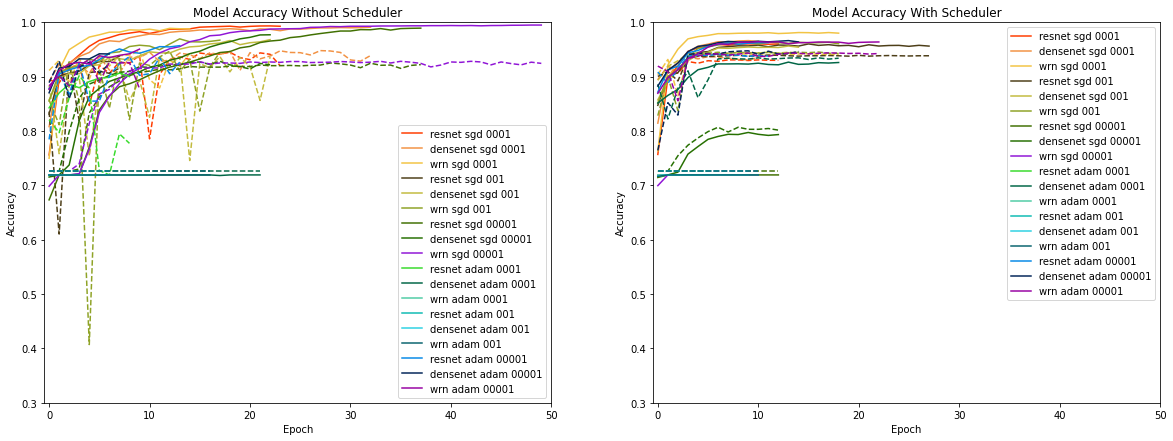

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,7))

style=['#ff3c00', '#f29244', '#f2c444', '#4d3e18', '#c2bb3e', '#8fa327', '#417002', '#277002', '#9015d6',
       '#38db2c', '#016646', '#50cca5', '#0fbab2', '#2dd1e3', '#09646e', '#0789e6', '#022559', '#9802a3']
for i, model in enumerate(train['model'].unique()):
  ax[0].plot(range(len(train[train.model == model])), train[train.model == model]['epoch_acc'], label=model, color=style[i])
  ax[0].plot(range(len(val[val.model == model])), val[val.model == model]['epoch_acc'], color=style[i], linestyle='dashed')

for i, model in enumerate(train_sch['model'].unique()):
  ax[1].plot(range(len(train_sch[train_sch.model == model])), train_sch[train_sch.model == model]['epoch_acc'], label=model, color=style[i])
  ax[1].plot(range(len(val_sch[val_sch.model == model])), val_sch[val_sch.model == model]['epoch_acc'], color=style[i], linestyle='dashed')

ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set(ylim=(0.3, 1.0))
ax[0].set(xlim=(-0.5, 50))
ax[0].set_title('Model Accuracy Without Scheduler')

ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set(ylim=(0.3, 1.0))
ax[1].set(xlim=(-0.5, 50))
ax[1].set_title('Model Accuracy With Scheduler')